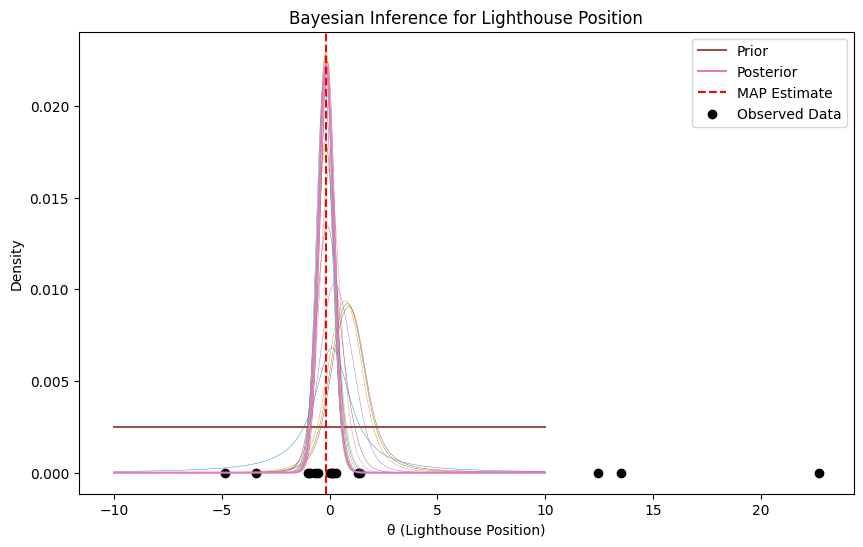

In [ ]:
# Coding lab3
# Cauchy's lighthouse problem 

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, cauchy

# 定义先验分布
prior = uniform(loc=-10, scale=20) # 在[-10, 10]上的均匀分布

# load data from lighthousedataframe.csv
position_data = np.loadtxt('lighthousedataframe.csv', delimiter=',', skiprows=1, usecols=1)

# 初始化后验分布
posterior = prior.pdf(np.linspace(-10, 10, 1000))  # 在[-10, 10]上进行网格化

# 可视化结果
plt.figure(figsize=(10, 6))

# 进行贝叶斯推断
for x in position_data:
    # TODO: likelihood = ?
    likelihood = cauchy.pdf(x, loc=np.linspace(-10, 10, 1000), scale=1)  # 似然函数
    # TODO: posterior = ?
    posterior = posterior * likelihood  # 更新后验分布
    posterior = posterior / np.sum(posterior)  # 标准化
    plt.plot(np.linspace(-10, 10, 1000), posterior, linewidth=0.3)

# 找到MAP估计
map_estimate = np.linspace(-10, 10, 1000)[np.argmax(posterior)]

plt.plot(np.linspace(-10, 10, 1000), prior.pdf(np.linspace(-10, 10, 1000)) / 20, label='Prior')
plt.plot(np.linspace(-10, 10, 1000), posterior, label='Posterior')
plt.axvline(map_estimate, color='red', linestyle='--', label='MAP Estimate')
plt.scatter(position_data, np.zeros_like(position_data), color='black', label='Observed Data')
plt.xlabel('θ (Lighthouse Position)')
plt.ylabel('Density')
plt.title('Bayesian Inference for Lighthouse Position')
plt.legend()
plt.savefig('lighthouse_inference.png', dpi=500)
plt.show()